In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import statistics as stats
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

In [2]:
visitsPerMothPath = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Step5"
duration_path = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Step5\Duration"
outpath = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Moth Visit Information"
outpath_fig = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Moth Visit Information\Figure"

In [3]:
moth_list_files = glob.glob(visitsPerMothPath + "\\*.csv")
moth_list_files

['C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\Data\\Step5\\L0.1_c-3_m10_RawDataForExplorationTime.csv',
 'C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\Data\\Step5\\L0.1_c-3_m12_RawDataForExplorationTime.csv',
 'C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\Data\\Step5\\L0.1_c-3_m20_RawDataForExplorationTime.csv',
 'C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\Data\\Step5\\L0.1_c-3_m21_RawDataForExplorationTime.csv',
 'C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\Data\\Step5\\L0.1_c-3_m22_RawDataForExplorationTime.csv',
 'C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\Data\\Step5\\L0.1_c-3_m23_RawDataForExplorationTime.csv',
 'C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\Data\\Step5\\L0.1_c-3_m24_RawDataForExplorationTime.csv',
 'C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\Data\\Step5\\L0.1_c-3_m25_RawDataForExplorationTime.csv',
 'C:\\Us

In [4]:
names = []
visit_per_moth = []
light_level = []
successful_visits = []
fed_status = []
for moth in moth_list_files:
    df = pd.read_csv(moth)
    name = moth[70:-30]
    visit_number = len(df.In_Frame)
    successful_number = len(df.ProboscisDetect[df.ProboscisDetect.values>0])
    successful_visits.append(successful_number)
    visit_per_moth.append(visit_number)
    names.append(name)
    if name.startswith("L50"):  
        light = ["high"]

    elif name.startswith("L0.1"):
        light = ["low"]
    if successful_number > 0:
        fed = ["yes"]
    else:
        fed = ["no"]
        
    fed_status.append(fed)
    light_level.append(light)
    
    duration = []
    pre_duration = []
    post_duration = []

    for dset in df.index:
        dur = df.Out_Frame.values[dset] - df.In_Frame.values[dset]
        if df.ProboscisDetect.values[dset]>0:
            pre_dur = df.ProboscisDetect.values[dset] - df.In_Frame.values[dset]
            post_dur = -df.ProboscisDetect.values[dset]+ df.Out_Frame.values[dset]
        else:
            pre_dur = dur
            post_dur = 0
        duration.append(dur)
        pre_duration.append(pre_dur)
        post_duration.append(post_dur)
#     new = pd.DataFrame({'duration': duration, 'pre_duration': pre_duration, 'post_duration': post_duration})
#     step5_duration = pd.concat([df,new], axis = 1)
#     step5_duration.to_csv(duration_path + "\\" + name + "_duration.csv")
# new_df = pd.DataFrame({'name' : names, 'visits' : visit_per_moth, 'successful_visits' : successful_visits,
#                         'Fed_Status': list(np.squeeze(fed_status)), 'Light_Level': list(np.squeeze(light_level))})
# new_df.to_csv(outpath + "\\" + "Moth_Visits_Table.csv")
# names, visit_per_moth, successful_visits, fed_status, light_level

C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


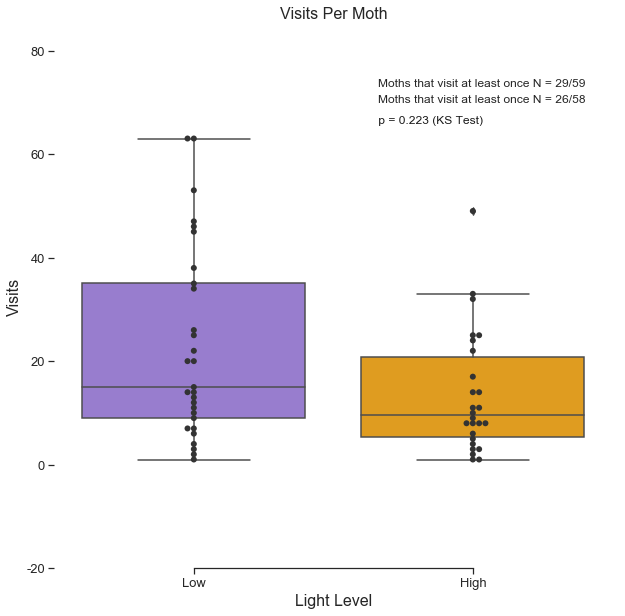

In [5]:
moth_data = pd.read_csv(outpath + "\\Moth_Visits_Table.csv")

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="Light_Level", y="visits", data=moth_data,
           palette=['mediumpurple','orange'])

# Add in points to show each observation
sns.swarmplot(x="Light_Level", y="visits", data=moth_data,
              size=6, color="0.2", linewidth=0)

high_visit = len(moth_data[(moth_data.Light_Level.str.contains("high")) & moth_data.visits.notnull()].index)
low_visit = len(moth_data[(moth_data.Light_Level.str.contains("low")) & moth_data.visits.notnull()].index)

lineb = ax.plot(np.zeros(0), '-b')
liner = ax.plot(np.zeros(0), '-r')
lines = (lineb,liner)


# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set_ylabel("Visits", size = 16)
ax.set_xlabel("Light Level", size = 16)
ax.set_title("Visits Per Moth", size = 16)
ax.set_xticklabels(["Low","High"], size = 13)
ax.set_yticklabels(np.arange(-20,100, 20), size = 13)
ax.set_ylim(-20,85)
ax.text(0.65, 66, ' p = 0.223 (KS Test)', color = 'k', size = 12)
ax.text(0.66, 70,'Moths that visit at least once N = ' +str(high_visit)  + "/58")
ax.text(0.66, 73, 'Moths that visit at least once N = ' + str(low_visit) + "/59")
sns.despine(trim=True, left=True)
# plt.savefig(outpath_fig + "\\VisitsPerMoth_Box.png")
#include zero visit boys

In [6]:
high_visit_list = moth_data[(moth_data.Light_Level.str.contains("high")) & moth_data.visits.notnull()].visits.values
low_visit_list = moth_data[(moth_data.Light_Level.str.contains("low")) & moth_data.visits.notnull()].visits.values
sc.stats.ks_2samp(high_visit_list, low_visit_list)

Ks_2sampResult(statistic=0.2718832891246684, pvalue=0.22263576786799408)

In [7]:
high_succ_list = moth_data[(moth_data.Light_Level.str.contains("high")) & moth_data.successful_visits.notnull()].successful_visits.values
low_succ_list = moth_data[(moth_data.Light_Level.str.contains("low")) & moth_data.successful_visits.notnull()].successful_visits.values
sc.stats.ks_2samp(high_succ_list, low_succ_list)

Ks_2sampResult(statistic=0.3819628647214854, pvalue=0.02632929218815092)

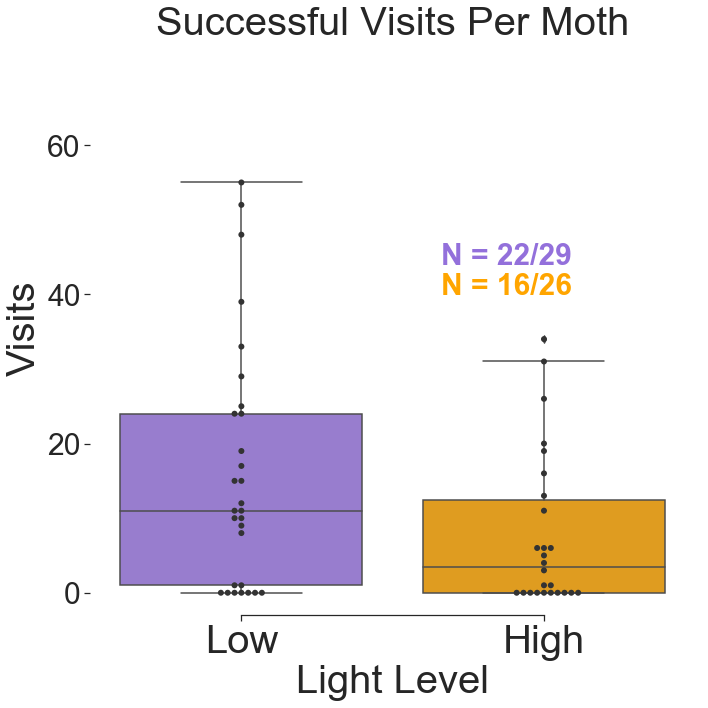

In [15]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="Light_Level", y="successful_visits", data=moth_data,
           palette=['mediumpurple','orange'])

# Add in points to show each observation
sns.swarmplot(x="Light_Level", y="successful_visits", data=moth_data,
              size=6, color="0.2", linewidth=0)

high_fed = len(moth_data[(moth_data.Light_Level.str.contains("high")) & moth_data.Fed_Status.str.contains("yes")].index)
low_fed = len(moth_data[(moth_data.Light_Level.str.contains("low")) & moth_data.Fed_Status.str.contains("yes")].index)

# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set_ylabel("Visits", size = 40)
ax.set_xlabel("Light Level", size = 40)
ax.set_xticklabels(["Low","High"], size = 40)
for tick in ax.get_yticklabels():
    tick.set_fontsize(30) 
ax.set_title("Successful Visits Per Moth", size = 40)
ax.set_ylim(-3,74)
ax.locator_params(nbins=4, axis = "y")


ax.text(0.66, 40,'N = ' +str(high_fed)  + "/" + str(high_visit), color = 'orange', weight = 'bold', size = 30)
ax.text(0.66, 44, 'N = ' + str(low_fed) + "/" + str(low_visit), color = 'mediumpurple', weight = 'bold', size = 30)
sns.despine(trim=True, left=True)
plt.tight_layout()
plt.savefig(outpath_fig + "\\SuccessfulVisitsPerMoth_Box.png")

In [9]:
a

NameError: name 'a' is not defined

In [ ]:
test_stat = np.mean(moth_data.successful_visits[moth_data.Light_Level == "low"]) - np.mean(moth_data.successful_visits[moth_data.Light_Level == "high"])
test_stat

In [ ]:
# resample
def null_perm_test():
    null_trt = np.random.choice(moth_data.Light_Level, replace = False, size = len(moth_data.Light_Level))
    null_test_stat = np.mean(moth_data.successful_visits[null_trt == "low"]) - np.mean(moth_data.successful_visits[null_trt == "high"]) 
    return(null_test_stat)

# resample 10000 times to generate sampling distribution under the null hypothesis
null_dist = np.array([null_perm_test() for ii in range(10000)])

In [ ]:
plt.hist(null_dist, bins= 20)
plt.vlines(x = test_stat, ymin = 0, ymax =1000, color = "red")
plt.vlines(x = -test_stat, ymin = 0, ymax =1000, color = "red")
plt.show()

In [ ]:
pval = np.mean((null_dist >= test_stat) | (-test_stat >= null_dist) )
pval

In [ ]:
moth_data[(moth_data.Light_Level.str.contains("high"))].values

In [ ]:
moth_data = pd.read_csv(r"C:\Users\Daniellab\Documents\TanviStuff\MultiSensory\Lightlevel-FlowerShape\MothChart-LightLevel-FlowerShape.csv")
high_visit_flower = len(moth_data[(moth_data.Animal_Name.str.contains("L50_c-3")) & moth_data.Total_trials.notnull()].index)
low_visit_flower = len(moth_data[(moth_data.Animal_Name.str.contains("L0.1_c-3")) & moth_data.Total_trials.notnull()].index)
high_visit_flower, low_visit_flower

In [ ]:
duration_list = glob.glob(duration_path + "\\*duration.csv")
df1 = []
df2 = []
df3 = []
df4 = []
df5 = []
df6 = []
df7 = []
df8 = []
df9 = []

for file in duration_list:
    df = pd.read_csv(file)
    nam = file[79:-13]
    name = [nam]*len(df["In_Frame"])
    if nam.startswith("L50"):
        light = ["high"]*len(df["In_Frame"])
    else: 
        light = ["low"]*len(df["In_Frame"])
    df1.extend(name)
    df2.extend(df.In_Frame)
    df3.extend(df.Out_Frame)
    df4.extend(df.ProboscisDetect)
    df5.extend(df.DiscoveryTime)
    df6.extend(df.duration)
    df7.extend(df.pre_duration)
    df8.extend(df.post_duration)
    df9.extend(light)
new_df = pd.DataFrame({'name': df1, 'In_Frame': df2, 'Out_Frame': df3, 'ProboscisDetect':df4, 
                      'DiscoveryTime': df5, 'duration': df6, 'pre_duration': df7, 'post_duration': df8, 'Light_Level': list(np.squeeze(df9))})
new_df.to_csv(duration_path + "\\all_moth_durations.csv")

In [ ]:
duration_data = pd.read_csv(duration_path + "\\all_moth_durations.csv") 
duration_data['duration(s)'] = pd.Series(duration_data['duration'].values/100, index=duration_data.index)

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(30, 15))


# Plot the orbital period with horizontal boxes
sns.violinplot(x="name", y="duration(s)", hue = "Light_Level", dodge=False, data=duration_data,
          inner="quart",
           palette=['mediumpurple','darkorange'])

# Add in points to show each observation
sns.swarmplot(x="name", y="duration(s)", data=duration_data,
              size=5, color="0.6", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.tick_params(axis='x', which='major', labelsize=17,  rotation=90)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.set_ylabel("Duration (s)",  size = 30, labelpad=10)
ax.set_xlabel("Moth",  size = 30, labelpad=20)
ax.set_title("Duration of each visit for each moth", size = 40)
ax.legend(prop={'size': 20})
sns.despine(trim=True, left=True)
plt.savefig(outpath_fig + "\\DurationPerVisitPerMoth_Violin.png")

In [ ]:
# duration without outliers
from scipy import stats
z = np.abs(stats.zscore(duration_data['duration(s)'].values))
outlier_ID = z > 5
duration_data['zscore'] = z
duration_data['outlier_ID'] = outlier_ID
notoutliers_dur = duration_data[duration_data.outlier_ID == False]

In [ ]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(30, 15))


# Plot the orbital period with horizontal boxes
sns.violinplot(x="name", y="duration(s)", hue = "Light_Level", dodge=False, data=notoutliers_dur,inner="quart",
           palette=['mediumpurple','darkorange'])

# Add in points to show each observation
sns.swarmplot(x="name", y="duration(s)", data=notoutliers_dur,
              size=5, color="0.6", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.tick_params(axis='x', which='major', labelsize=17,  rotation=90)
ax.tick_params(axis='y', which='major', labelsize=17)
ax.set_ylabel("Duration (s)",  size = 30, labelpad=10)
ax.set_xlabel("Moth",  size = 30, labelpad=20)
ax.set_title("Duration of each visit for each moth. No outliers", size = 40)
ax.legend(prop={'size': 20})
sns.despine(trim=True, left=True)
plt.savefig(outpath_fig + "\\NoOutliers_DurationPerVisitPerMoth_Violin.png")